In [1]:
import torch
from torch import nn


In [2]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [3]:
device = 'mps'

In [4]:
import requests
import zipfile
from pathlib import Path
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

#If image folde doesn't  exist download it and prepare it

if image_path.is_dir():
    print (f"{image_path} directory already exist, skipping download")
else:
    print(f'{image_path} doesnt exist, creating one' )
    image_path.mkdir(parents=True, exist_ok=True)

#Making file and filling it with download content
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:  #Creating file pizza_steak_sushi || wb - write permission
    requests = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print ("Downloading")
    f.write(requests.content) #Writes dowloaded ti a file in with open string

 
#Unzip pizza steak sushi dataset
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip', "r") as zip_ref:
    print("Unzipping")
    zip_ref.extractall(image_path)





data/pizza_steak_sushi directory already exist, skipping download
Downloading
Unzipping


In [5]:
image_path

PosixPath('data/pizza_steak_sushi')

In [6]:
#Becoming one with data

import os 

def walk_through_dir(path):
    for dirpath, dirnames, filenames in os.walk(path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")
        
        

In [7]:
walk_through_dir(image_path)

There are 2 directories and 1 files in data/pizza_steak_sushi
There are 3 directories and 1 files in data/pizza_steak_sushi/test
There are 0 directories and 19 files in data/pizza_steak_sushi/test/steak
There are 0 directories and 31 files in data/pizza_steak_sushi/test/sushi
There are 0 directories and 25 files in data/pizza_steak_sushi/test/pizza
There are 3 directories and 1 files in data/pizza_steak_sushi/train
There are 0 directories and 75 files in data/pizza_steak_sushi/train/steak
There are 0 directories and 72 files in data/pizza_steak_sushi/train/sushi
There are 0 directories and 78 files in data/pizza_steak_sushi/train/pizza


In [8]:
train_dir = image_path/"train"
test_dir = image_path/"test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [9]:
#Visualize the images
import random
from PIL import Image



# Get all images paths
# Pick a random image using random.choice()
# Get image class name using pathlib.Path.parent.stem
# Open image using PIL
# Show image metadata
image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list


[PosixPath('data/pizza_steak_sushi/test/steak/296375.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/894825.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1868005.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/27415.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1016217.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1285886.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/502076.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3424937.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/690177.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/354513.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/2117351.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/100274.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/2144308.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/966174.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1882831.jpg'),
 PosixPath('data/pizza_steak_sushi

In [10]:
random_image_path = random.choice(image_path_list)
random_image_path
    

PosixPath('data/pizza_steak_sushi/train/steak/735441.jpg')

In [11]:
image_class = random_image_path.parent.stem
image_class

'steak'

In [92]:
img = Image.open(random_image_path)

random image path: data/pizza_steak_sushi/train/steak/735441.jpg
random_image class: steak
image height: 512
image width: 512


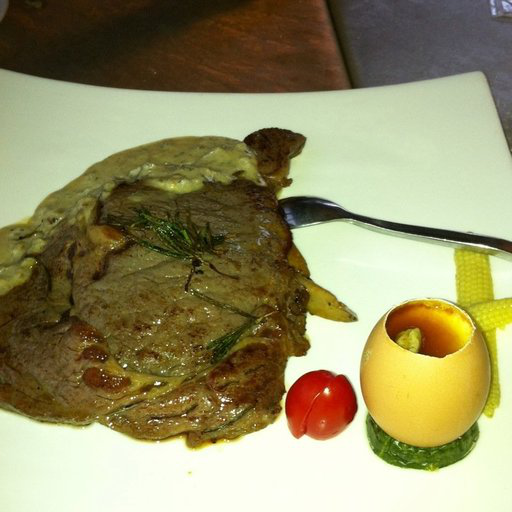

In [13]:
print(f'random image path: {random_image_path}')
print(f'random_image class: {image_class}')
print(f'image height: {img.height}')
print(f'image width: {img.width}')
img

(-0.5, 511.5, 511.5, -0.5)

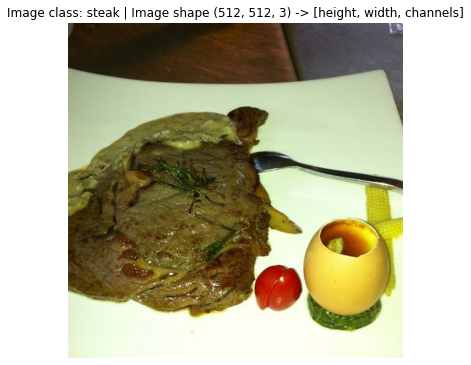

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# Show image with matplotlib
image_as_array = np.asarray(img)

plt.figure(figsize=(6,8))
plt.imshow(image_as_array)
plt.title(f'Image class: {image_class} | Image shape {image_as_array.shape} -> [height, width, channels]')
plt.axis(False)

Turning images into Torch tensors format


turn images into torch.utils.data.Dataset and subsequently to torch.utils.data.DataLoader we'll call it Dataset and DataLoader



In [15]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


Transforming data with torchvision.transforms

In [30]:
data_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                     transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.ToTensor()])

In [31]:
data_transform(img=img).shape

torch.Size([3, 64, 64])

In [32]:
data_transform(img)

tensor([[[0.5569, 0.4667, 0.4549,  ..., 0.1255, 0.1529, 0.2745],
         [0.4431, 0.4275, 0.4353,  ..., 0.1529, 0.1608, 0.2510],
         [0.3294, 0.3333, 0.3451,  ..., 0.1686, 0.1412, 0.1686],
         ...,
         [0.9529, 0.9569, 0.9608,  ..., 0.9216, 0.9137, 0.9059],
         [0.9529, 0.9569, 0.9569,  ..., 0.9216, 0.9137, 0.9020],
         [0.9490, 0.9529, 0.9569,  ..., 0.9216, 0.9137, 0.9020]],

        [[0.5725, 0.4706, 0.4627,  ..., 0.0784, 0.1020, 0.2431],
         [0.4353, 0.4196, 0.4431,  ..., 0.0902, 0.0980, 0.2118],
         [0.3098, 0.3216, 0.3412,  ..., 0.0980, 0.0902, 0.1294],
         ...,
         [0.9922, 0.9961, 1.0000,  ..., 0.9725, 0.9686, 0.9608],
         [0.9922, 0.9961, 0.9961,  ..., 0.9725, 0.9686, 0.9569],
         [0.9882, 0.9922, 0.9961,  ..., 0.9725, 0.9647, 0.9569]],

        [[0.6941, 0.5686, 0.5451,  ..., 0.0157, 0.0392, 0.2000],
         [0.4980, 0.4745, 0.5137,  ..., 0.0157, 0.0275, 0.1490],
         [0.3059, 0.3333, 0.3725,  ..., 0.0157, 0.0157, 0.

Visualising transfored image

In [33]:
def plot_transformed_images(image_paths:list, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].axis(False)
            ax[0].set_title(f'Original\nSize: {f.size}')

            #Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0) #changing shape for matplotlib (C, H, W) -> (H, W, C)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'Transformed\nSize: {transformed_image.shape}')
            ax[1].axis(False)

            fig.suptitle(f'Class: {image_path.parent.stem}', fontsize=16)



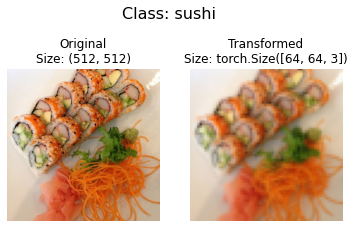

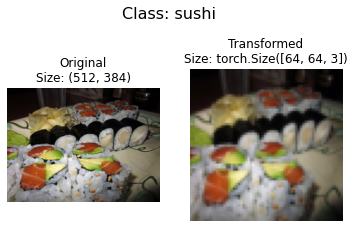

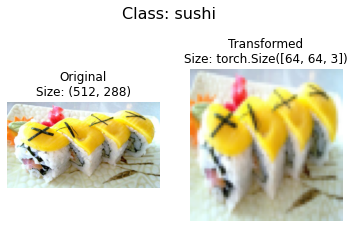

In [34]:
plot_transformed_images(image_paths=image_path_list, transform=data_transform,
                        n=3, seed=46)

Loding images data using ImageFolder

In [35]:
from torchvision import datasets

In [39]:
# Use ImageFolder to create datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, #transform for data
                                  target_transform=None)  #transform for target


test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform) #transform for data
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [40]:
# Getting class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [41]:
#Get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [42]:
len(train_data), len(test_data)

(225, 75)

In [44]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [98]:
# Index on tran_data Dataset ti get single image and label
img, label = train_data[0][0], train_data[0][1]
print (f'Image tenor:\n {img}')
print (f'image shape {img.shape}')
print (f'Image datatype {img.dtype}')
print (f'Image label {label}')
print (f'Label datatype {type(label)}')



Image tenor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

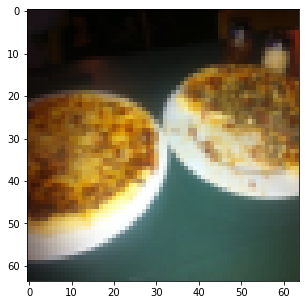

In [110]:
#Changing colorchannels  to see image in matplotlib

permuted_image = img.permute(1,2,0)

plt.figure(figsize=(5,5))
plt.imshow(permuted_image)


Making a DataLoader from Dataset. It makes images iterable and set a batchsize

In [ ]:
# Turn train and test datasets into Dataloader

In [111]:
import os
os.cpu_count()

8

In [120]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1

train_data_loader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                               num_workers=os.cpu_count(),
                               shuffle=True)
test_data_loader = DataLoader(dataset=test_data,
                               batch_size=BATCH_SIZE,
                               num_workers=os.cpu_count(),
                               shuffle=False)  

In [121]:
train_data_loader, test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x1751cdaf0>,
 <torch.utils.data.dataloader.DataLoader at 0x1751cd790>)

In [122]:
len(train_data_loader), len(test_data_loader)

(225, 75)

In [125]:
img, label = next(iter(train_data_loader))
print (f'Image shape: {img.shape} -> batch_size, color_channels, height, width')
print (f'Label shape: {label.shape}')

Image shape: torch.Size([1, 3, 64, 64]) -> batch_size, color_channels, height, width
Label shape: torch.Size([1])


MAKING DATASEST WITHOUT IMAGE_Folder CLASS and UseIt with DataLoader

Replicating Image_folder Class

In [ ]:
# Want to load images from file
# Want to be able to get class names from Dataset
# Want to be able to get classes as dictionary from the Dataset
 

HAVENT DONE ONLY WATCHED IF YOU NEED WATCH IT